In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input/imet-2020-fgvc7")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "labels.csv"            "sample_submission.csv" "test"                 
[4] "train"                 "train.csv"

In [ ]:
reticulate::virtualenv_install(packages="pandas")

ERROR: ignored

In [ ]:
import pandas as pd
pd.read_csv("kaggle competitions download -c imet-2020-fgvc7")

ERROR: ignored

In [ ]:
library(keras)
library(EBImage)

# Exploring Images

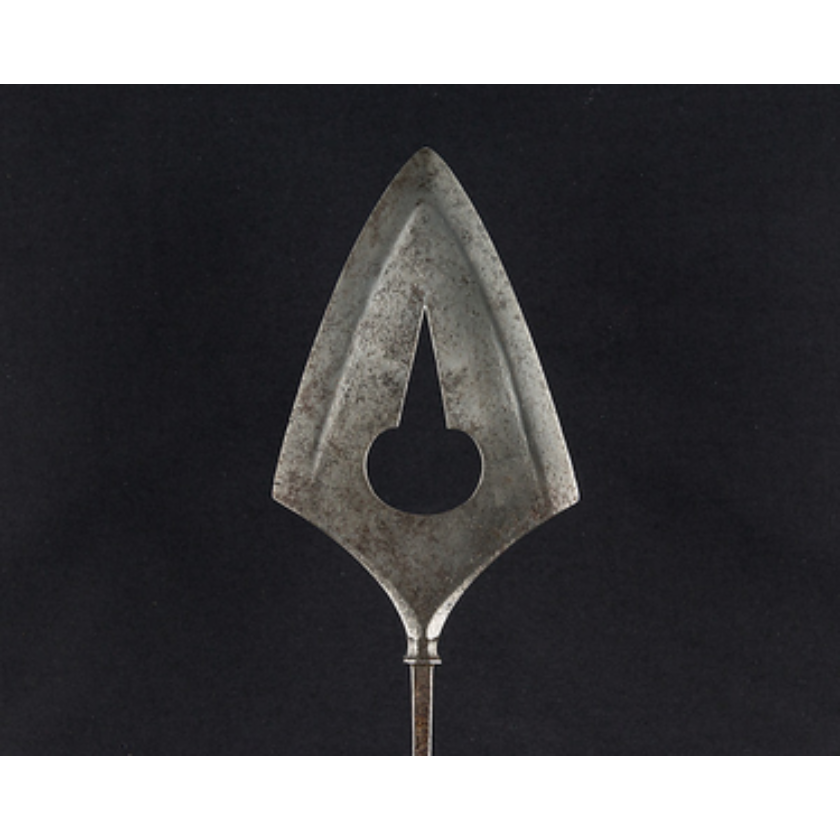

In [ ]:
image <- readImage('../input/imet-2020-fgvc7/train/000040d66f14ced4cdd18cd95d91800f.png')
display(image)

In [ ]:
image

Image 
  colorMode    : Color 
  storage.mode : double 
  dim          : 375 300 3 
  frames.total : 3 
  frames.render: 1 

imageData(object)[1:5,1:6,1]
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.1098039 0.1176471 0.1254902 0.1333333 0.1294118 0.1137255
[2,] 0.1137255 0.1215686 0.1215686 0.1254902 0.1254902 0.1215686
[3,] 0.1333333 0.1215686 0.1215686 0.1254902 0.1098039 0.1137255
[4,] 0.1333333 0.1176471 0.1176471 0.1294118 0.1137255 0.1098039
[5,] 0.1215686 0.1176471 0.1098039 0.1137255 0.1176471 0.1215686

# Loading Train and Test Datasets

In [ ]:
df_train = read.csv('/kaggle/input/imet-2020-fgvc7/train.csv')
df_label = read.csv('/kaggle/input/imet-2020-fgvc7/labels.csv')
submission = read.csv('/kaggle/input/imet-2020-fgvc7/sample_submission.csv')

Warning message in file(file, "rt"):
“cannot open file '/kaggle/input/imet-2020-fgvc7/train.csv': No such file or directory”


ERROR: ignored

In [ ]:
df_test = read.csv('/kaggle/input/imet-2020-fgvc7/sample_submission.csv')

In [ ]:
df_label$attribute_id = as.character(df_label$attribute_id)

In [ ]:
labels_seg = df_label %>% separate(attribute_name,c("attribute_type","attribute_name"))

Warning message:
“Expected 2 pieces. Additional pieces discarded in 1949 rows [11, 13, 17, 18, 19, 20, 21, 22, 25, 26, 27, 31, 39, 44, 47, 48, 49, 50, 51, 53, ...].”


In [ ]:
head(labels_seg)

,attribute_id,attribute_type,attribute_name
,<chr>,<chr>,<chr>
1,0,country,afghanistan
2,1,country,alamania
3,2,country,algeria
4,3,country,arabia
5,4,country,armenia
6,5,country,austria


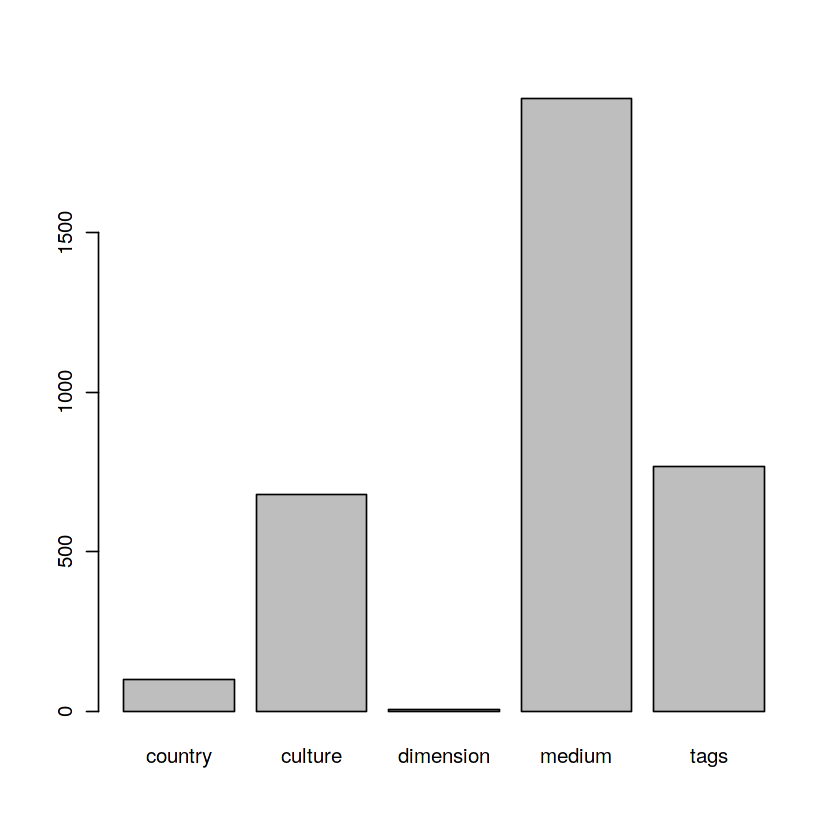

In [ ]:
plot((factor(labels_seg$attribute_type)))

In [ ]:
head(df_train)

,id,attribute_ids
,<fct>,<fct>
1,000040d66f14ced4cdd18cd95d91800f,448 2429 782
2,0000ef13e37ef70412166725ec034a8a,2997 3231 2730 3294 3099 2017 784
3,0001eeb4a06e8daa7c6951bcd124c3c7,2436 1715 23
4,000226398d224de78b191e6db45fd94e,2997 3433 448 782
5,00029c3b0171158d63b1bbf803a7d750,3465 3322 3170 1553 781
6,0002f685f83528cc3c92ba7f01110db5,2883 3293 3465 3286 448 2635 2088 785


In [ ]:
# combine_string = function(x){
#     paste(as.character(x),'.png',sep="")    
# }
# df_train$id = lapply(df_train$id, FUN = combine_string)
# df_train$id[1:5]

In [ ]:
df_train$id = paste(df_train$id,'.png',sep='')
df_train$id[1:5]

[1] "000040d66f14ced4cdd18cd95d91800f.png"
[2] "0000ef13e37ef70412166725ec034a8a.png"
[3] "0001eeb4a06e8daa7c6951bcd124c3c7.png"
[4] "000226398d224de78b191e6db45fd94e.png"
[5] "00029c3b0171158d63b1bbf803a7d750.png"

In [ ]:
factor_to_list = function(x){
    strsplit(as.character(x), " ")[[1]]
}
df_train$attribute_ids = lapply(df_train$attribute_ids, FUN=factor_to_list)
df_train$attribute_ids[1:5]

[[1]]
[1] "448"  "2429" "782" 

[[2]]
[1] "2997" "3231" "2730" "3294" "3099" "2017" "784" 

[[3]]
[1] "2436" "1715" "23"  

[[4]]
[1] "2997" "3433" "448"  "782" 

[[5]]
[1] "3465" "3322" "3170" "1553" "781"

In [ ]:
df_test$id = paste(df_test$id,'.png',sep='')
df_test$id[1:5]

[1] "00011f01965f141f5d1eea6592fa9862.png"
[2] "00014abc91ed3e4bf1663fde8136fe80.png"
[3] "0002e2054e303badc1a33463f6fb7973.png"
[4] "0002e8f35f85f28bebfb28f2a627dc4d.png"
[5] "00082dfc0de78506f96104bc05eb5a49.png"

In [ ]:
head(df_test)

,id,attribute_ids
,<chr>,<fct>
1,00011f01965f141f5d1eea6592fa9862.png,0 1 2
2,00014abc91ed3e4bf1663fde8136fe80.png,0 1 2
3,0002e2054e303badc1a33463f6fb7973.png,0 1 2
4,0002e8f35f85f28bebfb28f2a627dc4d.png,0 1 2
5,00082dfc0de78506f96104bc05eb5a49.png,0 1 2
6,000bb8d1f7cb3335a562e464749bb6e1.png,0 1 2


# Reshaping and Resizing the data

## image_data_generator from keras package is used to rescale the data
## flow_images_from_dataframe from keras package is used to generate batches of datasets for btoh test and train

In [ ]:
training_datagen = image_data_generator(rescale = 1./255,
                                      rotation_range=180,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=TRUE,
                                      fill_mode='nearest')

In [ ]:
test_datagen = image_data_generator(rescale = 1./255)

In [ ]:
head(df_train)

,id,attribute_ids
,<chr>,<list>
1,000040d66f14ced4cdd18cd95d91800f.png,"448 , 2429, 782"
2,0000ef13e37ef70412166725ec034a8a.png,"2997, 3231, 2730, 3294, 3099, 2017, 784"
3,0001eeb4a06e8daa7c6951bcd124c3c7.png,"2436, 1715, 23"
4,000226398d224de78b191e6db45fd94e.png,"2997, 3433, 448 , 782"
5,00029c3b0171158d63b1bbf803a7d750.png,"3465, 3322, 3170, 1553, 781"
6,0002f685f83528cc3c92ba7f01110db5.png,"2883, 3293, 3465, 3286, 448 , 2635, 2088, 785"


In [ ]:
# df_train$attribute_ids ='1'
# df_train$attribute_ids2 = '2'

In [ ]:
train_generator = flow_images_from_dataframe(dataframe=df_train,
                                                       directory='/kaggle/input/imet-2020-fgvc7/train/',
                                                       x_col='id',
                                                       y_col='attribute_ids',
                                             generator = training_datagen,
                                                       batch_size=128,
                                                       seed=17,
                                                       shuffle=TRUE,
                                                       class_mode="categorical",
                                                       target_size=c(128,128))

In [ ]:
test_generator = flow_images_from_dataframe(dataframe=df_test,
                                                       directory='/kaggle/input/imet-2020-fgvc7/test/',
                                                       x_col='id',
                                            generator = test_datagen,
                                                       batch_size=1,
                                                       seed=17,
                                                       shuffle=FALSE,
                                                       class_mode=NULL,
                                                       target_size=c(128,128))

In [ ]:
train_generator$filenames[1:5]

[1] "000040d66f14ced4cdd18cd95d91800f.png"
[2] "0000ef13e37ef70412166725ec034a8a.png"
[3] "0001eeb4a06e8daa7c6951bcd124c3c7.png"
[4] "000226398d224de78b191e6db45fd94e.png"
[5] "00029c3b0171158d63b1bbf803a7d750.png"

In [ ]:
train_generator$class_indices[1:5]

$`0`
[1] 0

$`1`
[1] 1

$`10`
[1] 2

$`100`
[1] 3

$`1000`
[1] 4

# Convolutional Neural Network
## Since the data consists of images and very huge dataset, CNN is the optimal model to approach this problem as it is specialized for image study

In [ ]:

# Initialize sequential model
model <- keras_model_sequential()

model %>%
 
  # Start with hidden 2D convolutional layer being fed 32x32 pixel images
  layer_conv_2d(
    filter = 32, kernel_size = c(3,3), padding = "same", 
    input_shape = c(128, 128, 3)
  ) %>%
  layer_activation("relu") %>%

  # Use max pooling
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.25) %>%

  # Second hidden layer
  layer_conv_2d(filter = 32, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%

  # Use max pooling
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.25) %>%
  
  # 2 additional hidden 2D convolutional layers
  layer_conv_2d(filter = 32, kernel_size = c(3,3), padding = "same") %>%
  layer_activation("relu") %>%
  layer_conv_2d(filter = 32, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%

  # Use max pooling once more
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.25) %>%
  
  # Flatten max filtered output into feature vector 
  # and feed into dense layer
  layer_flatten() %>%
  layer_dense(512) %>%
  layer_activation("relu") %>%
  layer_dropout(0.5) %>%

  # Outputs from dense layer are projected onto 10 unit output layer
  layer_dense(3471) %>%
  layer_activation("sigmoid")

opt <- optimizer_rmsprop(lr = 0.0001, decay = 1e-6)

model %>% compile(
  loss = "categorical_crossentropy",
  optimizer = opt,
  metrics = "accuracy"
)

In [ ]:
summary(model)

Model: "sequential_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_8 (Conv2D)                   (None, 128, 128, 32)            896         
________________________________________________________________________________
activation_12 (Activation)          (None, 128, 128, 32)            0           
________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)      (None, 64, 64, 32)              0           
________________________________________________________________________________
dropout_8 (Dropout)                 (None, 64, 64, 32)              0           
________________________________________________________________________________
conv2d_9 (Conv2D)                   (None, 62, 62, 32)              9248        
________________________________________________________________________________
activa

# Model Fit
## Using fit_generator from keras to fit the CNN Model.
## Using total of 3 Epochs, 128 batchsize, 300/1000 steps per epoch

In [ ]:
model %>% fit_generator(
    generator= train_generator,
    steps_per_epoch = 300,
    callbacks = list(callback_early_stopping(monitor = "val_loss",patience = 10)),
    epochs = 3, 
    verbose = 1
  )

# Prediction for Test data using the fitted model

In [ ]:
pred = model%>%predict_generator(generator= test_generator,steps = test_generator$n, verbose=1)

In [ ]:
mask = pred>0.4

In [ ]:
for (i in 1:nrow(df_test)){
    req_idx = mask[i,]
    labels=paste(names(train_generator$class_indices[req_idx]),collapse=' ')
    #df_label[df_label$attribute_id %in% names(train_generator$class_indices[req_idx]),]
    df_test$attribute_ids[i]=labels
    }

In [ ]:
df_test = apply(df_test,2,as.character)

In [ ]:
write.csv(df_test,'steps_300.csv',sep=',')